Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Emily Holcomb"
COLLABORATORS = ""

---

# Pivoting for Fun and Profit

In this exercise, we're going to continue working with data about condemned buildings in St. Louis.  This data set is in `/data/condemn.txt` in CSV format.

## STEP 1: Load and Filter data

For this analysis, we want to look only at a relevent range of years and only years that are in teh past.  So, let's first take a look at the data between 1986 and 2014 (inclusive of those dates).

At the end of this step, you should have a data frame loaded from the condemnations file and filtered down to only the data between 1986 and 2014.  Put that into a dataframe named `condemnations`

**Some helpful notes:**
* Use the columns `InspectDate` to filter this date range

In [1]:
%matplotlib inline
import pandas as pd
import math

# YOUR CODE HERE
condemnations = pd.read_csv('/data/condemn.txt')


/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (2,8,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
condemnations['Year'] = pd.to_numeric(condemnations['InspectDate'].str[0:4])

In [5]:
condemnations = condemnations[condemnations['Year'] >= 1986]

In [6]:
condemnations = condemnations[condemnations['Year'] <= 2014]

In [7]:
assert(condemnations.shape == (30232, 41))
assert(len(condemnations[condemnations['InspectDate'] < '1986'])==0)
assert(len(condemnations[condemnations['InspectDate'] >= '2015'])==0)

## STEP 2: Pivot and Summarize

In this step we want to pivot our data so that we have one row per year, a column for each value that appears in the `Status` column, and a count of how many condemnations occurred of each type in each year.  Put your summary pivot table into a variable called `by_year`.

**Some helpful notes:**
* For some reason, Pandas is just kind of stubborn about count being the aggregate function.  You may need to tell it to `np.ma.count` specifically.  I've imported Numpy as np for you.

In [9]:
import numpy as np

# YOUR CODE HERE
by_year = condemnations.pivot_table(
            values='AcctNum', 
            index='Year', 
            columns='Status', 
            aggfunc=np.ma.count, 
            fill_value=0)

In [8]:
condemnations.head()

,AcctNum,PrclErr,AddrAdjusted,CityBlock,Parcel,OwnerCode,Handle,Parcel9,AddrNum,AddrSuf,...,AsrNbrhd,ImpactCode,NLC,Parity,Inspector,Images,FirstDate,LastDate,UpDateGeo,Year
0,1.0,0.0,False,3652.00,341.0,1.0,1.365200e+10,365200341.0,4049,,...,309.0,0.0,123.0,O,NaN,NaN,1987-08-07 00:00:00,2019-01-04 00:00:00,NaN,1986.0
1,2.0,0.0,False,666.00,80.0,0.0,1.066600e+10,66600080.0,906,,...,248.0,0.0,104.0,E,NaN,NaN,1988-06-28 00:00:00,2019-01-04 00:00:00,NaN,2009.0
2,3.0,0.0,False,3913.01,120.0,1.0,1.391301e+10,391301120.0,4218,,...,230.0,0.0,210.0,E,NaN,NaN,1990-08-28 00:00:00,2019-01-04 00:00:00,NaN,2003.0
3,4.0,2.0,False,3744.00,145.0,0.0,1.374400e+10,374400145.0,4145,,...,231.0,0.0,92.0,O,NaN,NaN,1990-06-12 00:00:00,2019-01-04 00:00:00,NaN,1996.0
4,5.0,0.0,False,1103.00,30.0,0.0,1.110300e+10,110300030.0,1936,,...,318.0,0.0,5.0,E,NaN,NaN,2006-12-21 00:00:00,2019-01-04 00:00:00,NaN,2006.0


In [10]:
by_year.head()

Status,B,L,R,W
Year,,,,
1986.0,22,12,19,112
1987.0,91,20,8,361
1988.0,215,16,15,297
1989.0,277,15,11,432
1990.0,119,29,8,322


In [90]:
assert(by_year.shape == (29, 4))
assert(list(by_year.columns) == ['B', 'L', 'R', 'W'])
assert(list(by_year.sum()) == [10572, 4966, 98, 9670])

## STEP 3: Plot and see what you see

Use Pandas built-in plotting capabilities to visualize this information in way that you think makes sense.  It might be that plotting a simple multi-series line chart would give you some insights.  Show your plot in the cell below, then answer some questions.

For each of the questions, enter the anser as a variable: `answer = "X"`

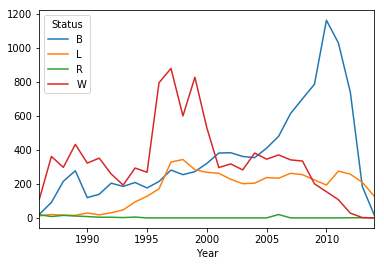

In [91]:
# YOUR CODE HERE
by_year.plot()

## Question 3.1

Which Status value has the highest peak around the year 2010?

Provide your solution as `answer = 'Some Series Label'` for example `answer = 'L'`

In [92]:
answer = 'Some Series Label'

# YOUR CODE HERE
answer = "B"

In [93]:
assert(type(answer) == str)

## Question 3.2

Which status value has the highest peak around 1996?


In [94]:

# YOUR CODE HERE
answer = "W"

In [95]:
assert(type(answer) == str)

## Question 3.3

Which status value has the lowest overall usage?

In [96]:

# YOUR CODE HERE
answer = "R"

In [97]:
assert(type(answer) == str)

## Question 3.4

Which status value has the highest overall peak in usage?


In [98]:

# YOUR CODE HERE
answer = "B"

In [99]:
assert(type(answer) == str)